In [0]:
pip install fastai==0.7.0

In [0]:
pip install torchvision==0.1.9

In [0]:
pip install torch==0.4.1

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *

In [0]:
from fastai.column_data import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
path_ratings='/content/drive/My Drive/ml-latest-small/ratings.csv'

In [0]:
ratings = pd.read_csv(path_ratings)

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
g = ratings.groupby('userId')['rating'].count()

In [11]:
g

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

In [0]:
topUsers = g.sort_values(ascending=False)[:15]

In [13]:
topUsers

userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
249    1046
387    1027
182     977
307     975
603     943
Name: rating, dtype: int64

In [0]:
g = ratings.groupby('movieId')['rating'].count()

In [0]:
topMovies = g.sort_values(ascending=False)[:15]

In [16]:
topMovies

movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
2959    218
1       215
1196    211
50      204
2858    204
Name: rating, dtype: int64

In [17]:
top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


In [0]:
val_idxs = get_cv_idxs(len(ratings))

In [0]:
wd=2e-4
n_factors = 50

In [0]:
path ='/content/drive/My Drive/ml-latest-small'

In [0]:
cf = CollabFilterDataset.from_csv(path, 'ratings.csv', 'userId', 'movieId', 'rating')

In [0]:
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [23]:
val_idxs

array([67037, 42175, 93850, ..., 67290, 33423, 98552])

In [24]:
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

  3%|▎         | 36/1261 [00:00<00:06, 179.57it/s, loss=1.61]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   
    0      0.743908   0.773024  
    1      0.702123   0.751732  
    2      0.599873   0.734226  



[0.7342258466500664]

In [25]:
math.sqrt(0.735)

0.8573214099741123

RMSE = 0.857. Benchmark RMSE = 0.91

In [26]:
preds = learn.predict()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


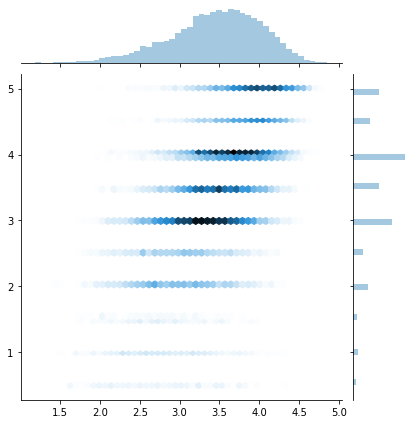

In [27]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

In [28]:
m=learn.model; m.cuda()

EmbeddingDotBias(
  (u): Embedding(610, 50)
  (i): Embedding(9724, 50)
  (ub): Embedding(610, 1)
  (ib): Embedding(9724, 1)
)

Modelling from scratch

Dot product implementation

In [29]:
a = T([[1.,2],[3,4]])
b = T([[2.,2],[10,10]])
a,b

(tensor([[1., 2.],
         [3., 4.]], device='cuda:0'), tensor([[ 2.,  2.],
         [10., 10.]], device='cuda:0'))

In [30]:
a*b

tensor([[ 2.,  4.],
        [30., 40.]], device='cuda:0')

In [31]:
(a*b).sum(1)

tensor([ 6., 70.], device='cuda:0')

In [0]:
class DotProduct(nn.Module):
  def forward(self, u, m):
    return (u*m).sum(1)

In [0]:
myModel = DotProduct()

In [34]:
myModel.forward(a,b)

tensor([ 6., 70.], device='cuda:0')

Dot product model

In [0]:
u_uniq = ratings.userId.unique()

In [0]:
user2idx = {o:i for i,o in enumerate(u_uniq)}

In [0]:
ratings.userId = ratings.userId.apply(lambda x: user2idx[x])

In [38]:
ratings

,userId,movieId,rating,timestamp
0,0,1,4.0,964982703
1,0,3,4.0,964981247
2,0,6,4.0,964982224
3,0,47,5.0,964983815
4,0,50,5.0,964982931
...,...,...,...,...
100831,609,166534,4.0,1493848402
100832,609,168248,5.0,1493850091
100833,609,168250,5.0,1494273047
100834,609,168252,5.0,1493846352


In [0]:
m_uniq = ratings.movieId.unique()
movie2idx = {o:i for i,o in enumerate(m_uniq)}
ratings.movieId = ratings.movieId.apply(lambda x: movie2idx[x])

In [40]:
ratings

,userId,movieId,rating,timestamp
0,0,0,4.0,964982703
1,0,1,4.0,964981247
2,0,2,4.0,964982224
3,0,3,5.0,964983815
4,0,4,5.0,964982931
...,...,...,...,...
100831,609,3120,4.0,1493848402
100832,609,2035,5.0,1493850091
100833,609,3121,5.0,1494273047
100834,609,1392,5.0,1493846352


In [0]:
n_users=int(ratings.userId.nunique())
n_movies=int(ratings.movieId.nunique())

In [42]:
n_users,n_movies

(610, 9724)

In [43]:
cf.n_users

610

In [44]:
cf.n_items

9724

In [0]:
class EmbeddingDot(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        self.u = nn.Embedding(n_users, n_factors)
        self.m = nn.Embedding(n_movies, n_factors)
        self.u.weight.data.uniform_(0,0.05)
        self.m.weight.data.uniform_(0,0.05)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        u,m = self.u(users),self.m(movies)
        return (u*m).sum(1).view(-1, 1)

In [0]:
x = ratings.drop(['rating', 'timestamp'],axis=1)
y = ratings['rating'].astype(np.float32)

In [47]:
x

,userId,movieId
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
100831,609,3120
100832,609,2035
100833,609,3121
100834,609,1392


In [48]:
y

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float32

In [0]:
data = ColumnarModelData.from_data_frame(path, val_idxs, x, y, ['userId', 'movieId'], 64)

In [0]:
wd=1e-5
model = EmbeddingDot(n_users, n_movies).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [51]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      1.613996   1.598949  
    1      1.069858   1.293917  
    2      0.860241   1.228701  



[1.2287012057092292]

In [0]:
set_lrs(opt, 0.01)

In [53]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss   
    0      0.687554   1.151557  
    1      0.682628   1.139595  
    2      0.646362   1.134128  



[1.134128233197957]

Add Bias to the model

In [54]:
min_rating,max_rating = ratings.rating.min(),ratings.rating.max()
min_rating,max_rating

(0.5, 5.0)

In [0]:
def get_emb(ni,nf):
    e = nn.Embedding(ni, nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

class EmbeddingDotBias(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        (self.u, self.m, self.ub, self.mb) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors), (n_users,1), (n_movies,1)
        ]]
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        um = (self.u(users)* self.m(movies)).sum(1)
        res = um + self.ub(users).squeeze() + self.mb(movies).squeeze()
        res = F.sigmoid(res) * (max_rating-min_rating) + min_rating
        return res.view(-1, 1)

In [0]:
wd=2e-4
model = EmbeddingDotBias(cf.n_users, cf.n_items).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [57]:
fit(model, data, 3, opt, F.mse_loss)

  4%|▍         | 50/1261 [00:00<00:04, 244.05it/s, loss=1.42]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   
    0      0.800973   0.818024  
    1      0.753902   0.7943    
    2      0.755668   0.787904  



[0.7879037667338693]

In [0]:
set_lrs(opt, 1e-2)

In [59]:
fit(model, data, 3, opt, F.mse_loss)

  3%|▎         | 44/1261 [00:00<00:05, 213.77it/s, loss=0.673]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   
    0      0.708329   0.781361  
    1      0.707217   0.77984   
    2      0.706677   0.7794    



[0.7793996662940351]

Creating a neural net

In [0]:
class EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_movies, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(movies)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_rating-min_rating+1) + min_rating-0.5

In [0]:
wd=1e-5
model = EmbeddingNet(n_users, n_movies).cuda()
opt = optim.Adam(model.parameters(), 1e-3, weight_decay=wd)

In [62]:
fit(model, data, 3, opt, F.mse_loss)

  3%|▎         | 40/1261 [00:00<00:06, 190.07it/s, loss=2.34]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   
    0      0.871311   0.79227   
    1      0.790699   0.774544  
    2      0.780993   0.7681    



[0.7681002917225658]

In [0]:
set_lrs(opt, 1e-3)

In [64]:
fit(model, data, 3, opt, F.mse_loss)

  3%|▎         | 37/1261 [00:00<00:07, 170.42it/s, loss=0.698]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   
    0      0.751868   0.770992  
    1      0.738822   0.773406  
    2      0.753004   0.772758  



[0.7727579698184548]